<a href="https://colab.research.google.com/github/jdug1981/proyecto_final/blob/main/La_pre_finalisima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Vision_producto](https://github.com/jdug1981/proyecto_final/blob/main/PRODUCT%20VISION%20BOARD.png?raw=true)

#**PROYECTO INTEGRADOR FINAL: BANK TELEMARKETING**
El objetivo es predecir si un cliente se suscribirá a un depósito a plazo fijo que se le ofrece mediante una campaña de telemarketing.

Para ello se propone crear un modelo de clasificación de aprendizaje automático con la finalidad poder usarlo en una población definida por un banco minorista de Portugal en el contexto de la recesión global del año 2008.
[Link Product Vision Board](https://github.com/jdug1981/proyecto_final/blob/main/PRODUCT%20VISION%20BOARD.png?raw=true)

## **DESCRIPCION DE LOS DATOS**
**1. Información Importante:**

Los datos están relacionados con campañas de marketing directo de una entidad bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para poder saber si el cliente se suscribiría a un depósito a plazo fijo.





**2. Objetivo:**

El objetivo es diseñar un modelo de clasificación para predecir si el cliente suscribirá un depósito a plazo (variable y).

**3. Número de Instancias:**

45211 for bank-full.csv (4521 for bank.csv)

**4. Número de atributos:**

 16 varaibles de entrada

 1 variable de salida o variable Objetivo


**5. Información sobre las Variables:**

**Variables de Entrada**
1. age: Edad del cliente (numérico).

2. job: Tipo de empleo del cliente (categórico): "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services".

3. marital: Estado civil del cliente (categórico): "married", "divorced", "single" (Nota: "divorced" significa divorciado o viudo).

4. education: Nivel de educación del cliente (categórico): "unknown", "secondary", "primary", "tertiary".

5. default: ¿Tiene el cliente crédito en mora? (binario): "yes", "no".

6. balance: Saldo promedio anual, en euros, del cliente (numérico).

7. housing: ¿Tiene el cliente un préstamo hipotecario? (binario): "yes", "no".

8. loan: ¿Tiene el cliente un préstamo personal? (binario): "yes", "no".

9. contact: Tipo de comunicación de contacto (categórico) relacionado con el último contacto de la campaña actual: "unknown", "telephone", "cellular".

10. day: Último día del mes en que se realizó el último contacto (numérico).

11. month: Último mes del año en que se realizó el último contacto (categórico): "jan", "feb", "mar", ..., "nov", "dec".

12. duration: Duración del último contacto en segundos (numérico).

13. campaign: Número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto).

14. pdays: Número de días transcurridos desde el último contacto de una campaña anterior con el cliente (numérico, -1 significa que el cliente no fue contactado anteriormente).

15. previous: Número de contactos realizados antes de esta campaña y para este cliente (numérico).

16. poutcome: Resultado de la campaña de marketing anterior (categórico): "unknown", "other", "failure", "success".

**Variable objetivo (target deseado):**

17. y: ¿El cliente ha suscrito un depósito a plazo? (binario): "yes", "no".



**6. Missing Attribute Values:**

None


In [1]:
# Definición de Librerias
!pip install pandas_profiling
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import ydata_profiling
import matplotlib.pyplot as plt
import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 82.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d9ad2eee1f8a4208d6d9bd8c55025af04bbf69b28c5f6a25045aae60e8d9a689
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

# 1. Leyendo y explorando data

In [3]:
mainpath = "bank_full.csv"
data = pd.read_csv(mainpath,sep=";")
pddf= pd.read_csv(mainpath,sep=";")

In [4]:
# Contar los datos:
print(data.shape)
# Validar la data de forma general
data.head()

(45211, 17)


age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Se observó:**

10 variables categóricas

7 variables numéricas

# 1.1 Análisis de la Variable Objetivo (y)
¿El cliente invirtió en un depósito a plazo fijo? : yes / no


In [6]:
#La variable Objetivo de tipo categórica se mapea en 0=no , yes=1
data["y"].unique()
data["y"]=pddf["y"].map({'no':0, 'yes':1})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


<Axes: xlabel='y', ylabel='count'>

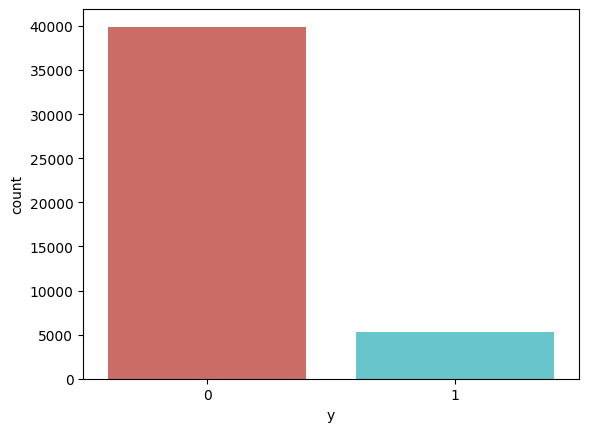

In [7]:
# Analizando la distribución de la variable objetivo.
sns.countplot(x='y', data = data, palette = 'hls')

In [8]:
#Media de la variable objetivo

print("Media de Y: ", data.y.mean(). round(3))
# Distribución de frecuencias de las respuestas a la suscripción de depósitos a plazo fijo (y)
frecuencias = data.groupby('y').agg({'y': ['count',  lambda x: 100*x.size/len(data)]})
frecuencias.columns = ['fi', 'hi%']
print("\nDistribución de frecuencias")
frecuencias


Media de Y:  0.117

Distribución de frecuencias


fi       hi%
y                 
0  39922  88.30152
1   5289  11.69848

**Se observó:**

1. *La variable objetivo es Categórica binaria.*  Por lo tanto, para el modelo de clasificación se codificó así:

> 0='no'   No se suscribió a un depósito a plazo fijo.

> 1='yes'  Si se suscribió a un depósito a plazo fijo.

2. La Distribucipon de frecuencias de la variable objetiva nos muestra una data desbalanceada. 88.3% de la muestra no se suscribió a un depósito a plazo fijo. Esto se puede explicar por el contexto de la crisis financiera del 2008.

3. La media 0.117, nos indica que en promedio se suscribieron 12 de cada 100.


# 1.1. Análisis de las variables categóricas

In [9]:
# Identificar las variables categóricas utilizando el atributo dtypes
variables_categoricas = data.select_dtypes(include=['object']).columns.tolist()
variables_categoricas

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [10]:
categorical_columns =data.select_dtypes(include=['object'])
categorical_columns.describe().transpose()

count unique          top   freq
job        45211     12  blue-collar   9732
marital    45211      3      married  27214
education  45211      4    secondary  23202
default    45211      2           no  44396
housing    45211      2          yes  25130
loan       45211      2           no  37967
contact    45211      3     cellular  29285
month      45211     12          may  13766
poutcome   45211      4      unknown  36959

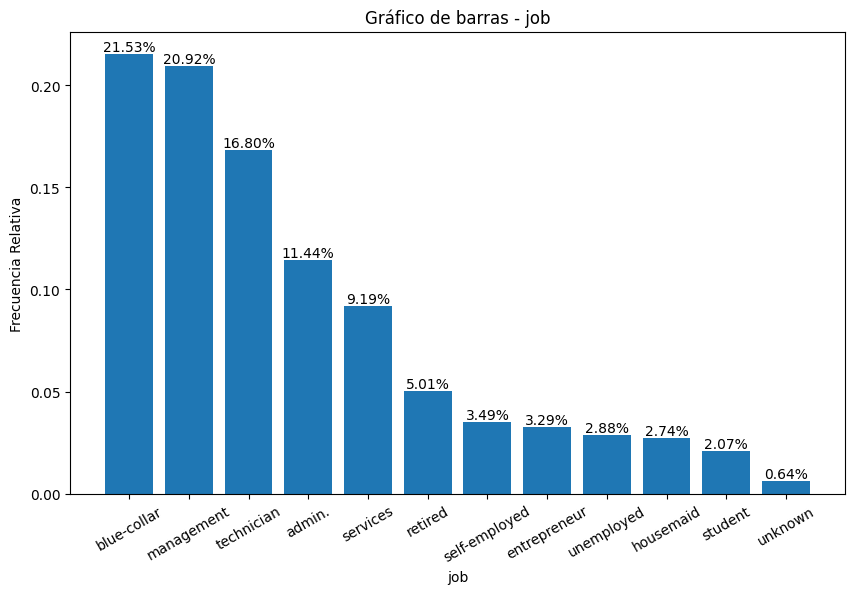

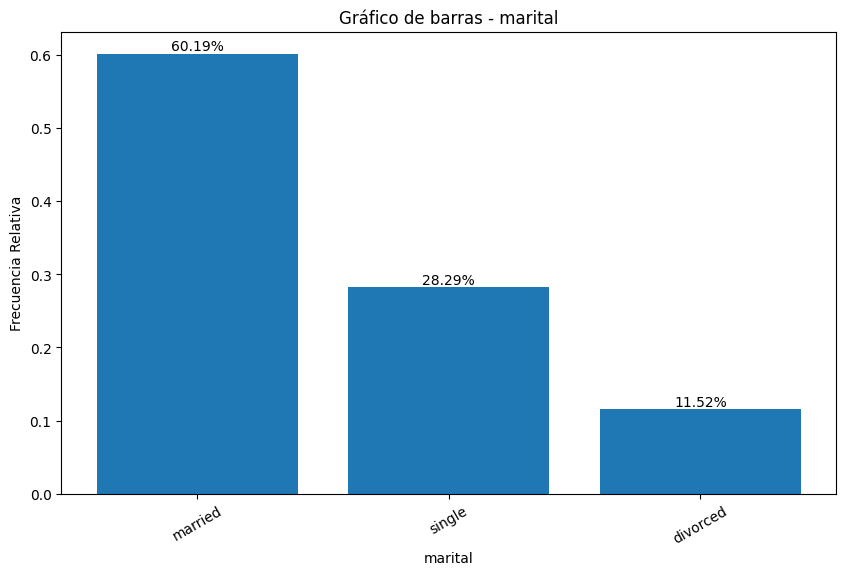

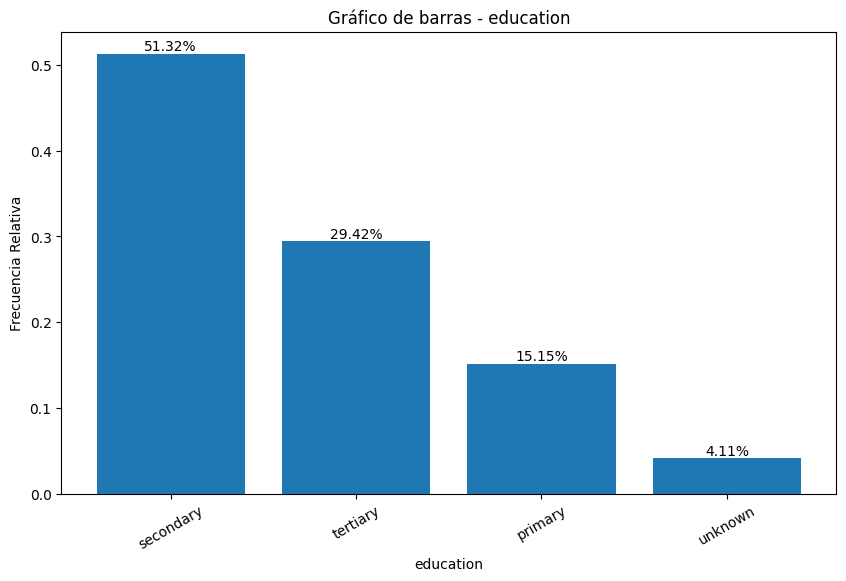

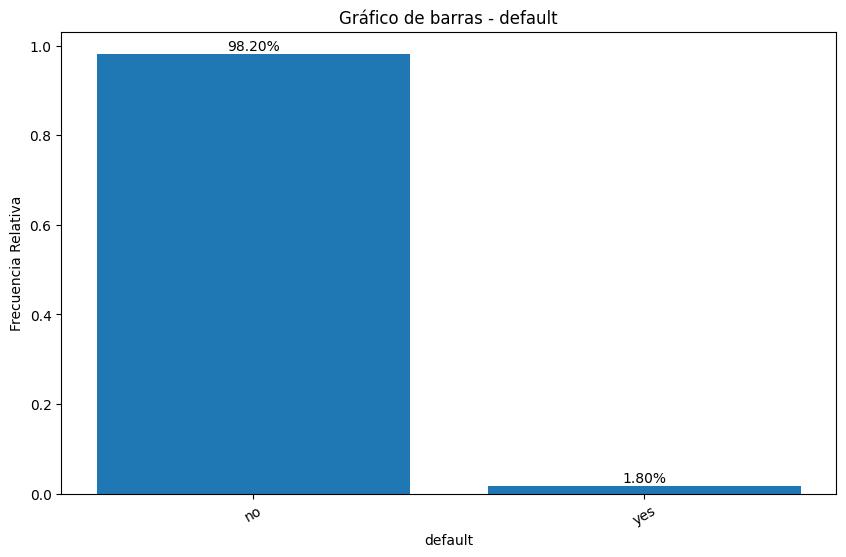

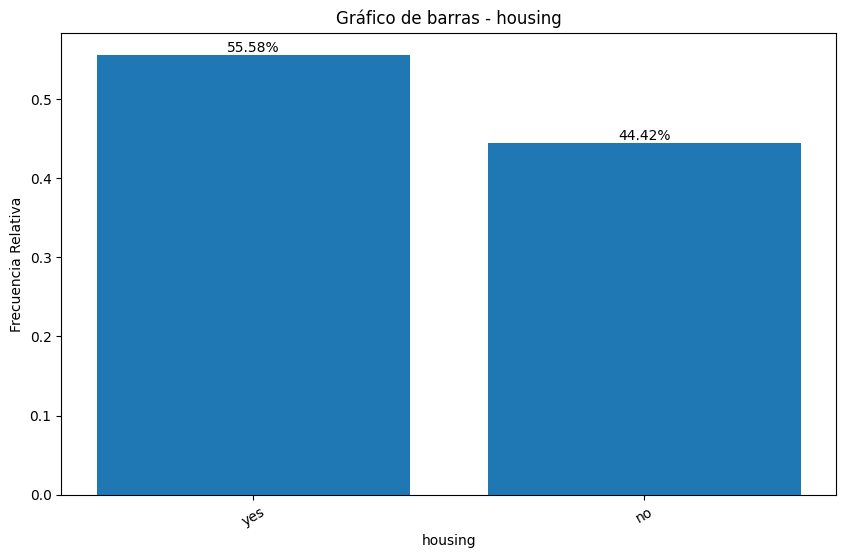

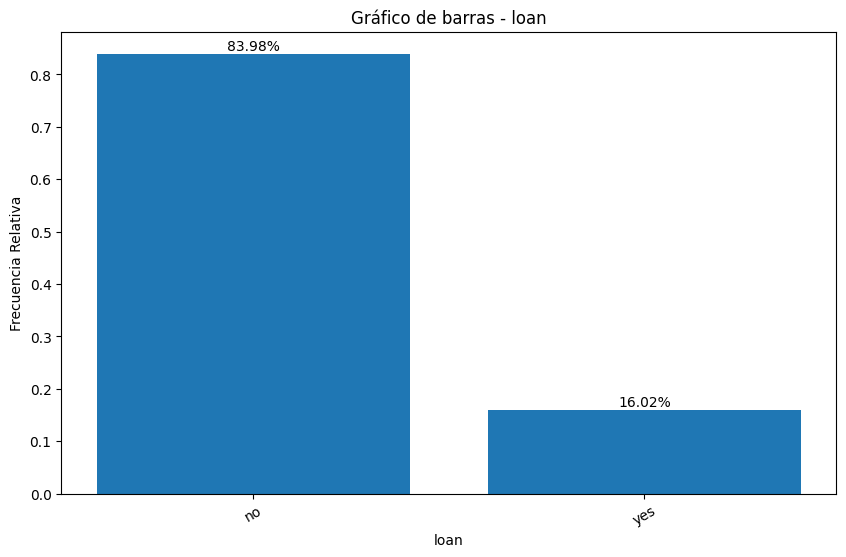

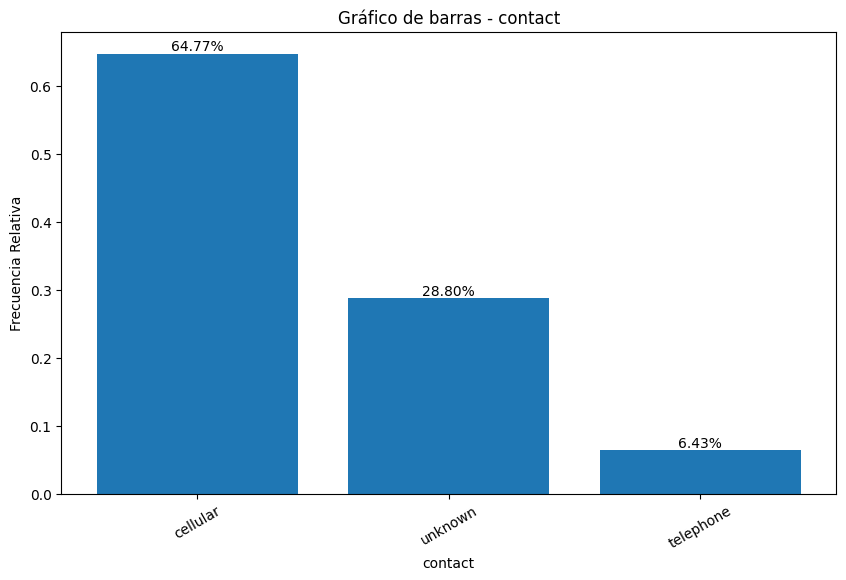

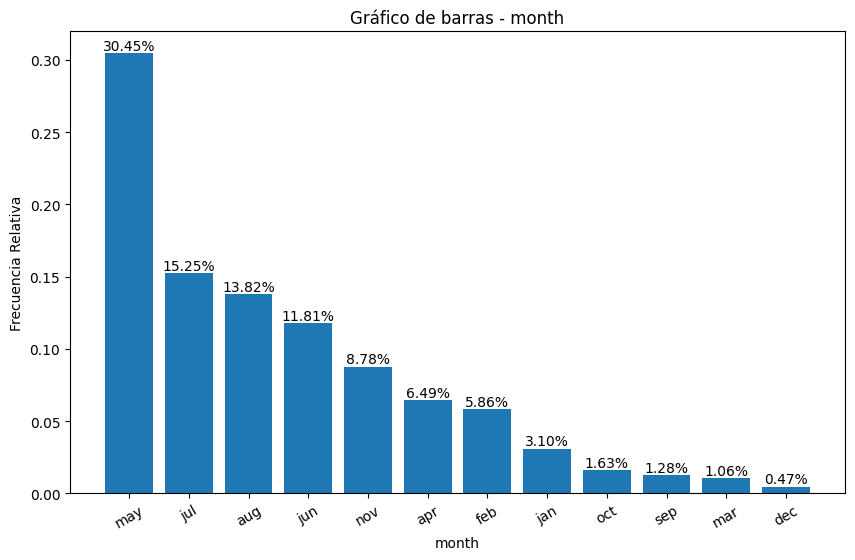

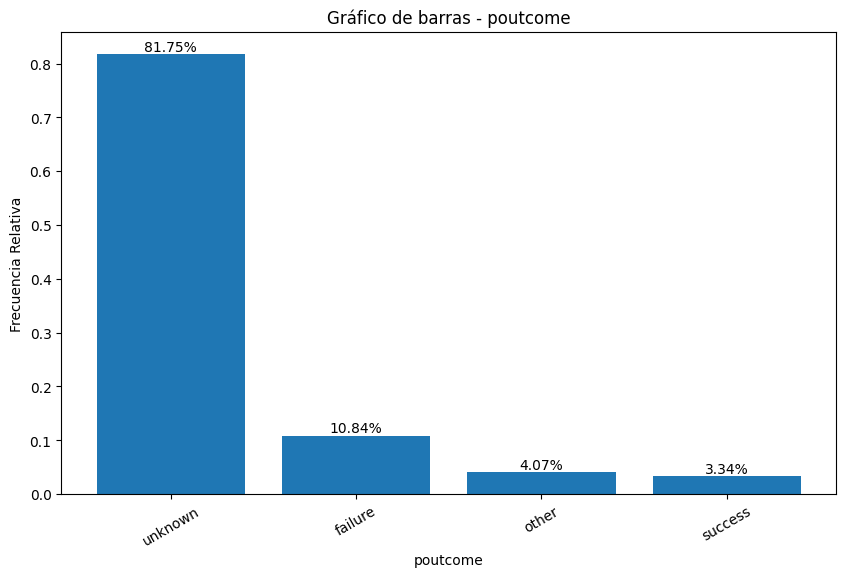

In [11]:
for column in categorical_columns:
    category_counts = data[column].value_counts(normalize=True)  # Calcular las frecuencias relativas
    plt.figure(figsize=(10, 6))
    plt.bar(category_counts.index, category_counts.values)
    plt.xlabel(column)
    plt.ylabel('Frecuencia Relativa')
    plt.title(f"Gráfico de barras - {column}")
    plt.xticks(rotation=30)

    # Mostrar las frecuencias relativas en las etiquetas de las barras
    for i, v in enumerate(category_counts.values):
        plt.text(i, v, f'{v:.2%}', ha='center', va='bottom')

    plt.show()

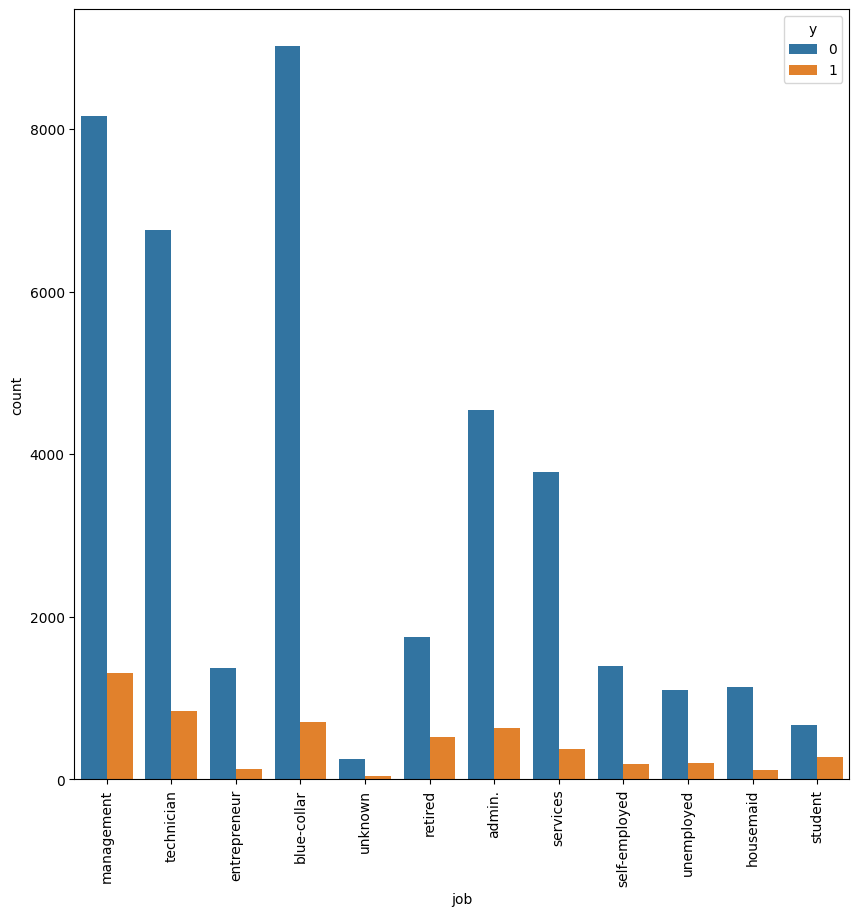

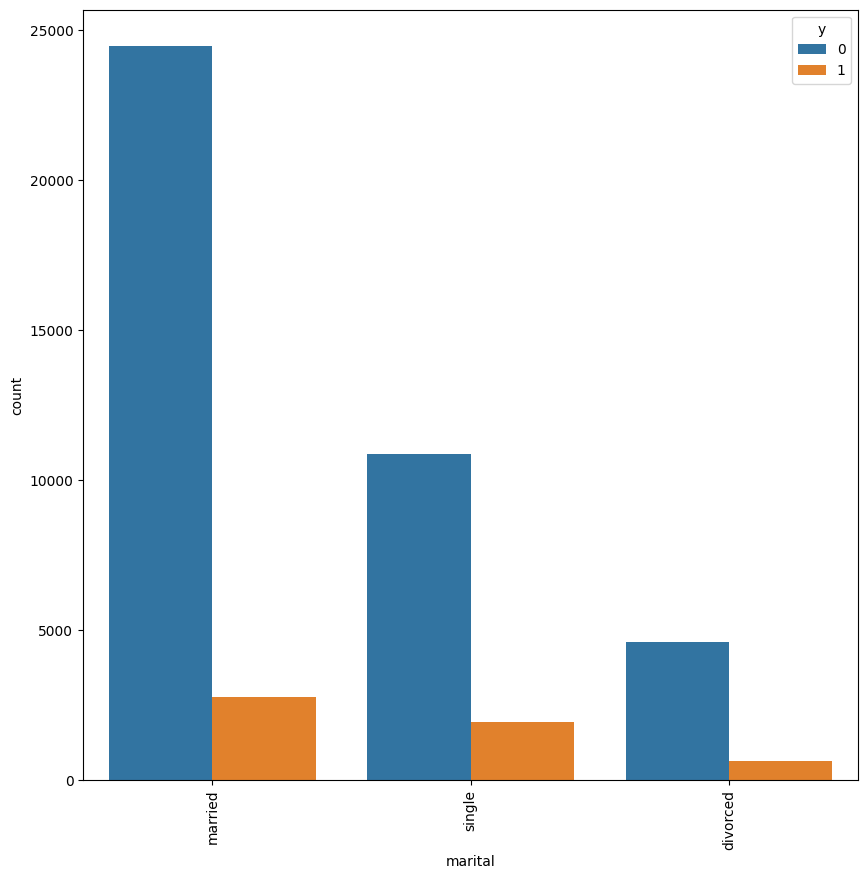

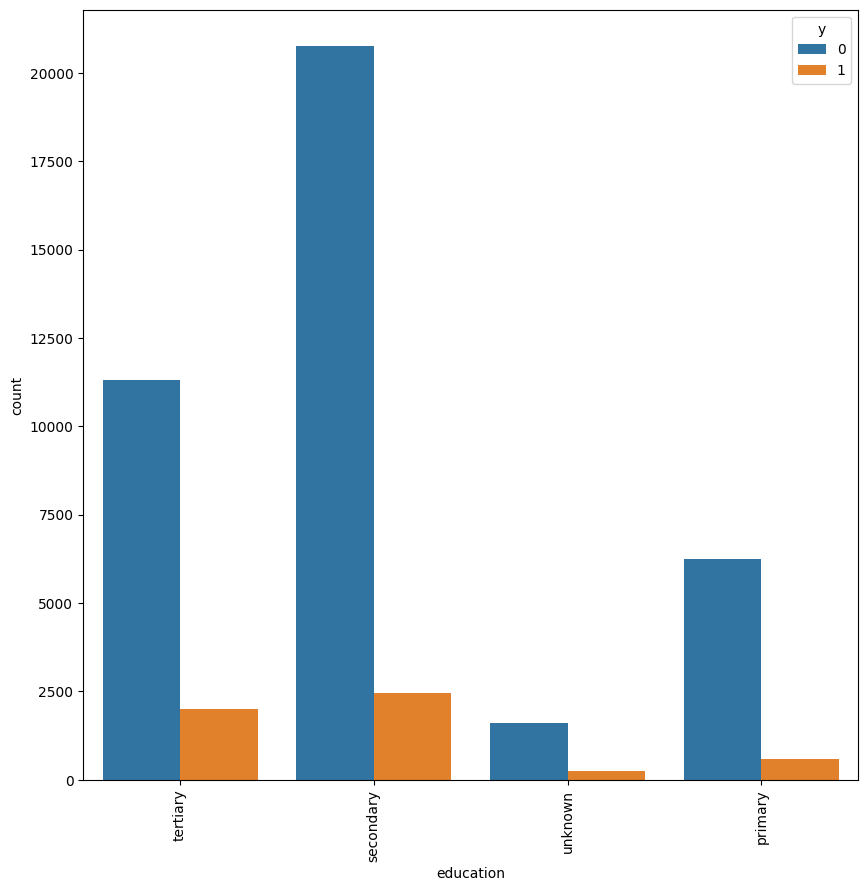

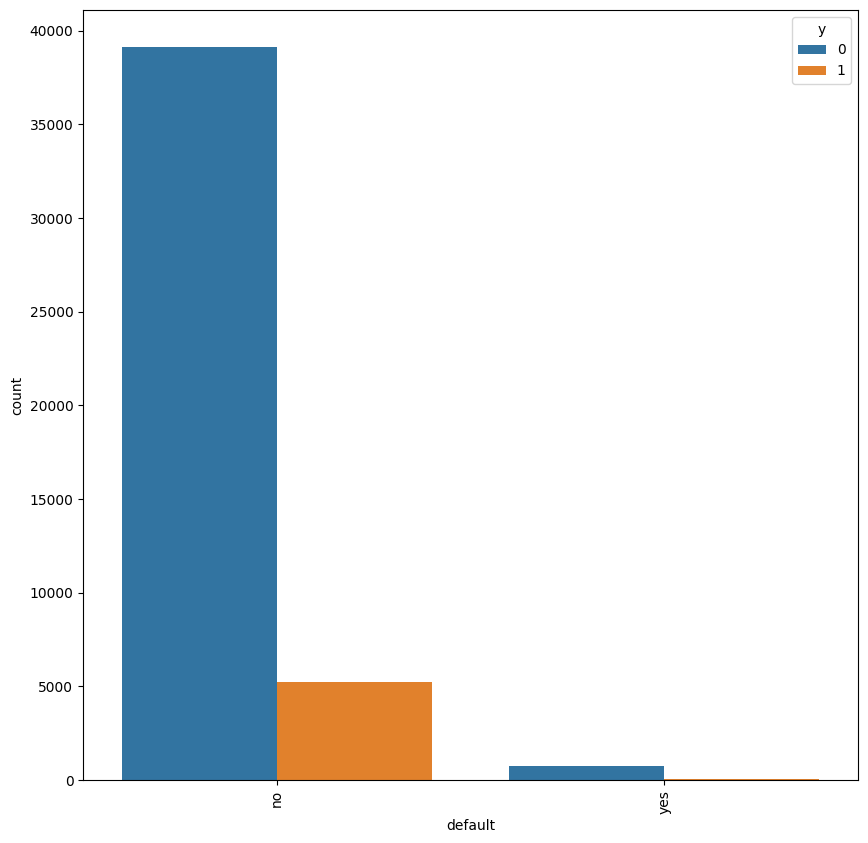

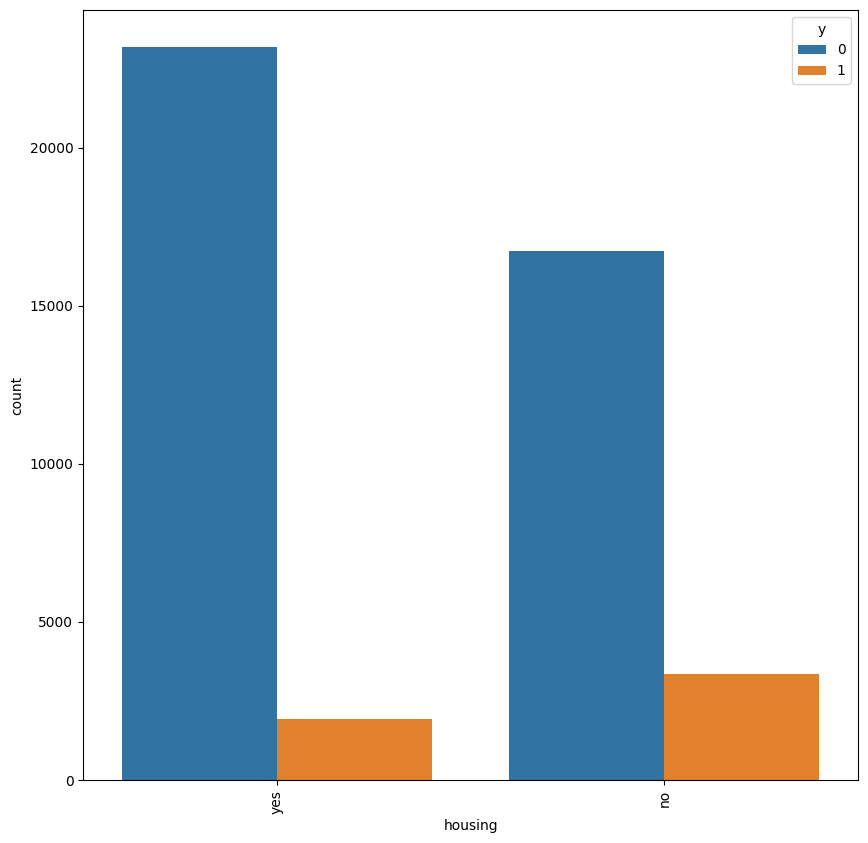

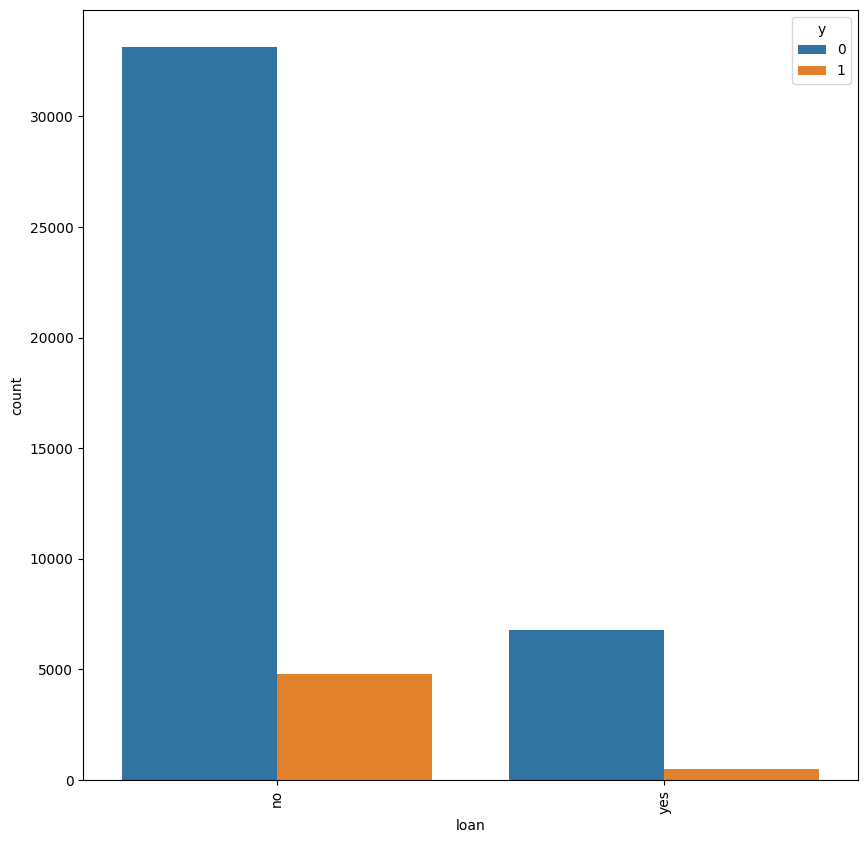

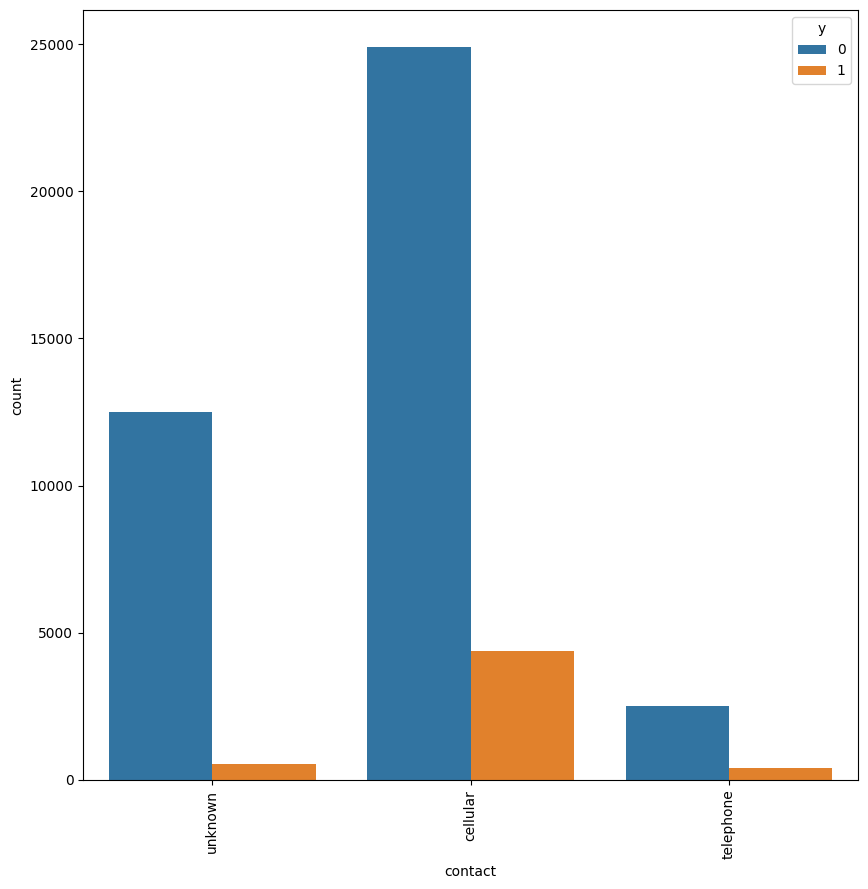

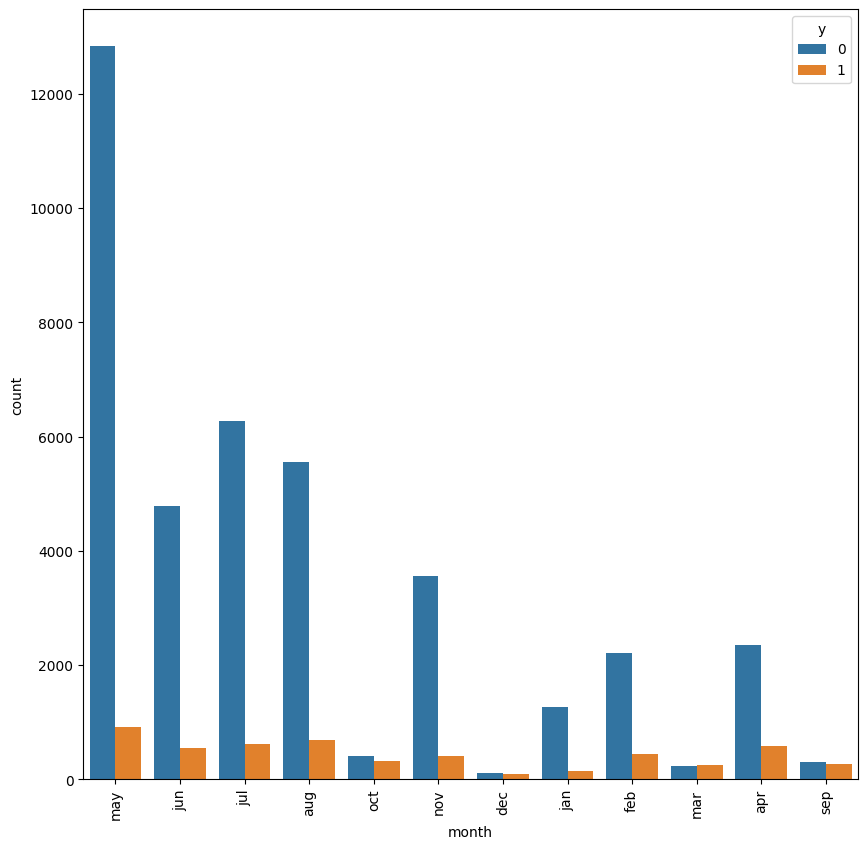

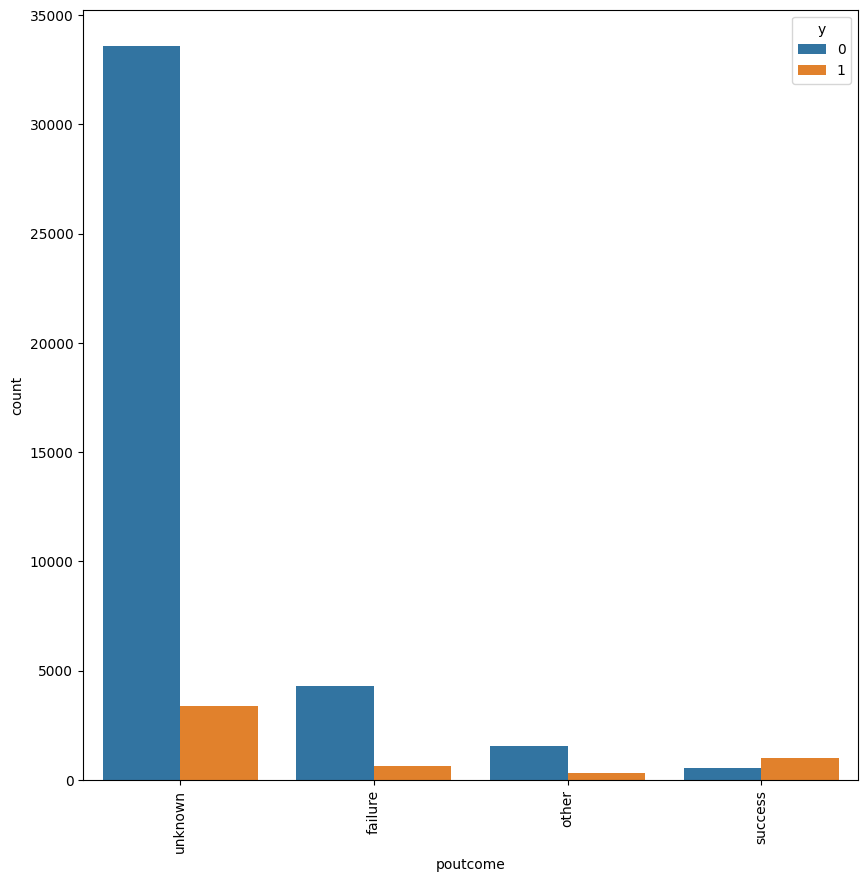

In [12]:
def plot_categorial(column):
    fig = plt.figure(figsize=(10,10))
    sns.countplot(data=data, x=column,hue='y')
    plt.xticks(rotation='vertical')
    plt.show()

column_cat = data.select_dtypes(include='object').columns

for _ in column_cat:
    plot_categorial(_)

**Análisis de la relación entre variables categóricas y una variable objetivo**

 Tabla de contingencia.

In [13]:
#Exploración de variables categóricas
# Con este análisis detectamos las relaciones que puede tener c/u de las variables vs la variable objetivo.
for column in categorical_columns:
  print("\n")
  print(data.groupby(column).agg(count=('y', 'count'), hi=('y', 'mean')).sort_values(by="hi", ascending=False))




               count        hi
job                           
student          938  0.286780
retired         2264  0.227915
unemployed      1303  0.155027
management      9458  0.137556
admin.          5171  0.122027
self-employed   1579  0.118429
unknown          288  0.118056
technician      7597  0.110570
services        4154  0.088830
housemaid       1240  0.087903
entrepreneur    1487  0.082717
blue-collar     9732  0.072750


          count        hi
marital                  
single    12790  0.149492
divorced   5207  0.119455
married   27214  0.101235


           count        hi
education                 
tertiary   13301  0.150064
unknown     1857  0.135703
secondary  23202  0.105594
primary     6851  0.086265


         count        hi
default                 
no       44396  0.117961
yes        815  0.063804


         count        hi
housing                 
no       20081  0.167024
yes      25130  0.077000


      count        hi
loan                 
no    37967  0.126

**Se observó:**
Analizando la relación de las variables categóricas con la variable objetivo (y), tenemos:

1. En **Job:** La categoría "*student*" tiene la mayor probabilidad (28.7%) de suscribir un depósito a plazo fijo.
2. En **marital:** La categoría "*single*" tiene la mayor probabilidad (14.9%) de suscribir un depósito a plazo fijo.     
3. En **education:** La categoría "*tertiary*" tiene la mayor probabilidad (15%) de suscribir un depósito a plazo fijo.           


# 1.2 Análisis de la variable numérica

In [14]:
# Identificar las variables numéricas utilizando el atributo dtypes
variables_numericas = data.select_dtypes(include=['number']).columns.tolist()
#variables_numericas.remove(target)
variables_numericas

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

In [15]:
numeric_columns = data.select_dtypes(include=['int64', 'float'])
numeric_columns.describe().transpose()

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   
y         45211.0     0.116985     0.321406     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0  
y              1.0

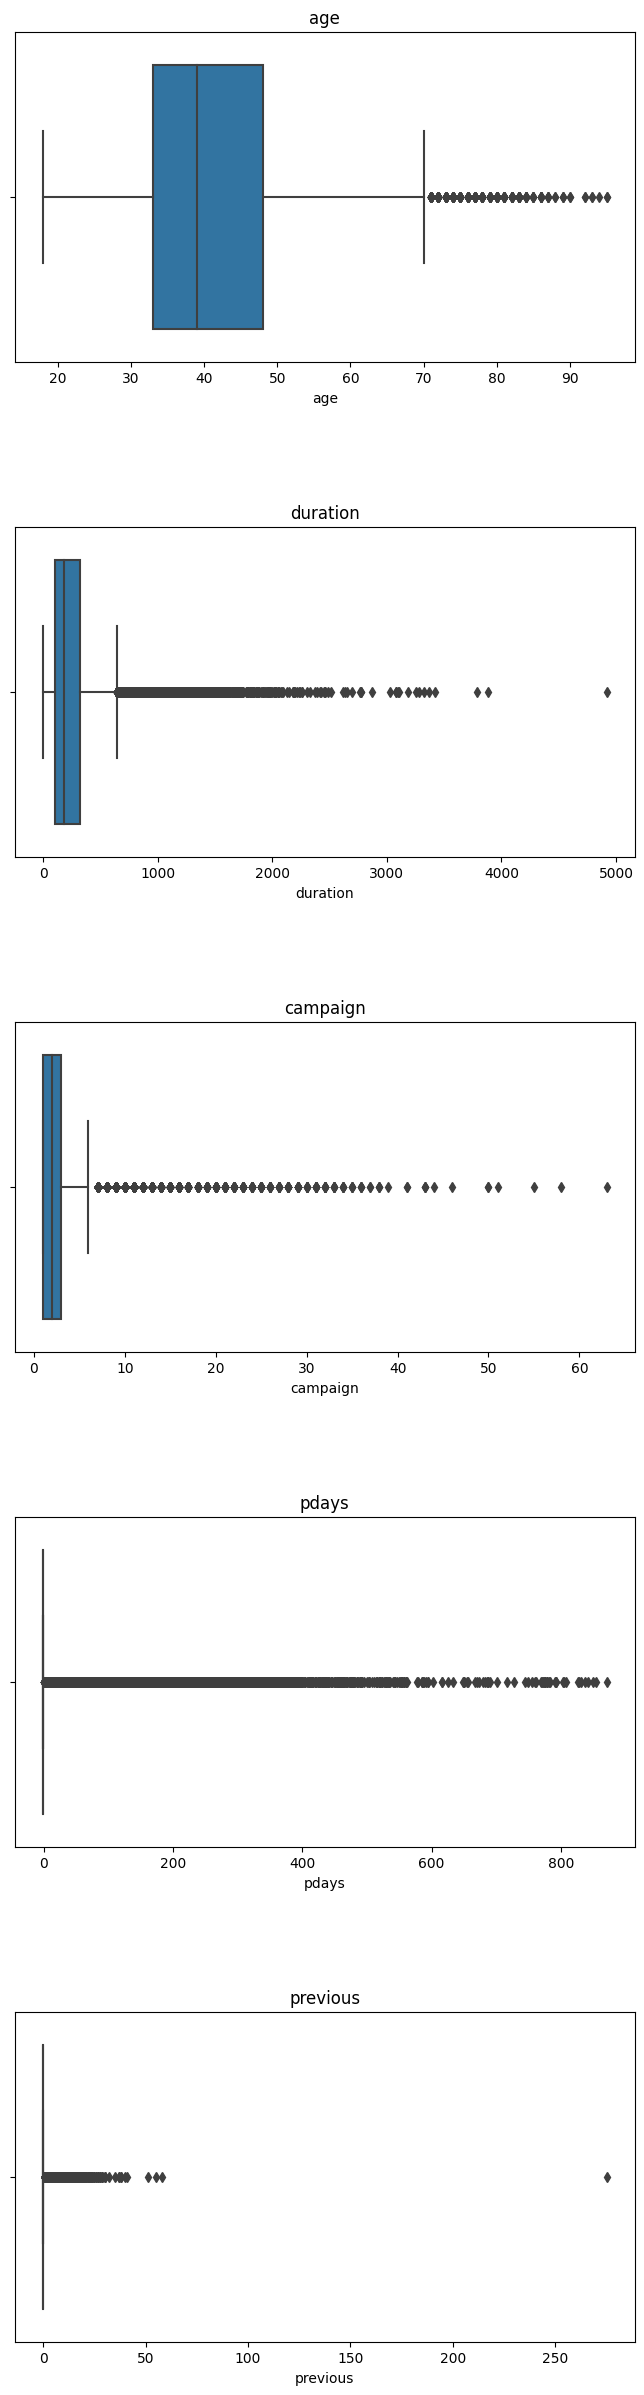

In [16]:
# Generar gráficas individuales boxplot pues las variables numéricas.
# están en rangos diferentes
cols_num = ['age', 'duration', 'campaign', 'pdays', 'previous']

fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

# 2. Selección de muestras

In [17]:
# Muestreo
from sklearn.model_selection import train_test_split

train, test = train_test_split(data,
                               stratify = data['y'],
                               train_size=0.7,
                               random_state=123)

In [18]:
print(f"Tamaño del total de datos: {len(data)}")
print(f"Tamaño de train: {len(train)}")
print(f"Tamaño de test: {len(test)}")

Tamaño del total de datos: 45211
Tamaño de train: 31647
Tamaño de test: 13564


# 3. Pre selección de variables

In [19]:
# Dando formato a nuestra tabla resumen
pdResume = train.describe().transpose()
# Ahora el nuevo index será el campo "feature"
pdResume.reset_index(inplace = True)
pdResume.rename(columns = {'index' : 'feature',
                           '25%' : 'Q1',
                           '50%' : 'median',
                           '75%' : 'Q3'}, inplace = True)
pdResume

feature    count         mean          std     min     Q1  median      Q3  \
0       age  31647.0    40.972825    10.657961    18.0   33.0    39.0    48.0   
1   balance  31647.0  1373.386040  3047.179071 -6847.0   73.0   448.0  1449.5   
2       day  31647.0    15.834234     8.335395     1.0    8.0    16.0    21.0   
3  duration  31647.0   258.173065   258.623603     0.0  103.0   179.0   317.0   
4  campaign  31647.0     2.779000     3.124117     1.0    1.0     2.0     3.0   
5     pdays  31647.0    40.340917   100.261049    -1.0   -1.0    -1.0    -1.0   
6  previous  31647.0     0.584605     2.472085     0.0    0.0     0.0     0.0   
7         y  31647.0     0.116978     0.321399     0.0    0.0     0.0     0.0   

        max  
0      95.0  
1  102127.0  
2      31.0  
3    3881.0  
4      58.0  
5     871.0  
6     275.0  
7       1.0

In [20]:
# Procedemos con crear la columna missig para ver el porcentaje de valores perdidos:
pdResume[['missing_rate']] = 1 - pdResume[['count']]/train.shape[0]
pdResume.sort_values(by = 'missing_rate', ascending = False, inplace = True)
pdResume

feature    count         mean          std     min     Q1  median      Q3  \
0       age  31647.0    40.972825    10.657961    18.0   33.0    39.0    48.0   
1   balance  31647.0  1373.386040  3047.179071 -6847.0   73.0   448.0  1449.5   
2       day  31647.0    15.834234     8.335395     1.0    8.0    16.0    21.0   
3  duration  31647.0   258.173065   258.623603     0.0  103.0   179.0   317.0   
4  campaign  31647.0     2.779000     3.124117     1.0    1.0     2.0     3.0   
5     pdays  31647.0    40.340917   100.261049    -1.0   -1.0    -1.0    -1.0   
6  previous  31647.0     0.584605     2.472085     0.0    0.0     0.0     0.0   
7         y  31647.0     0.116978     0.321399     0.0    0.0     0.0     0.0   

        max  missing_rate  
0      95.0           0.0  
1  102127.0           0.0  
2      31.0           0.0  
3    3881.0           0.0  
4      58.0           0.0  
5     871.0           0.0  
6     275.0           0.0  
7       1.0           0.0

In [21]:
# Se ejecuta este comando, pero en realidad como la data ya está trabajada o sin na, entonces no se elimina ningún registro
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [22]:
# Conteo de los niveles en las diferentes columnas categóricas:
# Como se verá en su ejecución, todas las variables categóricas poseen mas de 1 subnivel, por tal motivo no podremos a primera vista, eliminar alguna columna.
cols_cat = ['job','marital','education','default','housing','loan','contact','day','poutcome','y']
for col in cols_cat:
  print('Columna ', col, ': ' , data[col].nunique() ,  ' Subniveles')

Columna  job :  12  Subniveles
Columna  marital :  3  Subniveles
Columna  education :  4  Subniveles
Columna  default :  2  Subniveles
Columna  housing :  2  Subniveles
Columna  loan :  2  Subniveles
Columna  contact :  3  Subniveles
Columna  day :  31  Subniveles
Columna  poutcome :  4  Subniveles
Columna  y :  2  Subniveles


In [23]:
data.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous             y  
count  45211.000000  45211.000000  45211.000000  
mean      40.197828      0.580323      0.116985  
std      100.128746      2.303441      0.321406  
min       -1.000000      0.000000      0.000000  
25%       -1.000000      0.000000      0.000000  
50%       -1.000000      0.000000      0.000000  
75%       -1.000000      0.000000      0.000000  
max      871.000000    275.000000      1.000000

In [24]:
# Hemos validado que hay filas repetidas...Se eliminarán 12 filas.
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (45211, 17)
Tamaño del set después de eliminar las filas repetidas: (45211, 17)


# 4. Tratamiento de variables

In [25]:
train['poutcome'].value_counts()

unknown    25845
failure     3451
other       1292
success     1059
Name: poutcome, dtype: int64

In [26]:
train['poutcome'].drop_duplicates()

44828    success
11344    unknown
28435    failure
40225      other
Name: poutcome, dtype: object

In [27]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.6 MB/s eta 0:00:00


In [28]:
# Tratamiento con Target Encoder
# Se trabajará una consolidación con la variable "job"
from category_encoders import TargetEncoder

encoder = TargetEncoder(handle_unknown = 'infrequent_if_exist')
encoder.fit(train[variables_categoricas].astype('category'), train['y'])

TargetEncoder(cols=['job', 'marital', 'education', 'default', 'housing', 'loan',
                    'contact', 'month', 'poutcome'],
              handle_unknown='infrequent_if_exist')

In [29]:
TargetEncoder(cols=['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome'],
              handle_unknown='infrequent_if_exist')

TargetEncoder(cols=['job', 'marital', 'education', 'default', 'housing', 'loan',
                    'contact', 'month', 'poutcome'],
              handle_unknown='infrequent_if_exist')

In [30]:
train[[x + '_coded' for x in variables_categoricas]] = encoder.transform(train[variables_categoricas].astype('category'))
test[[x + '_coded' for x in variables_categoricas]] = encoder.transform(test[variables_categoricas].astype('category'))

In [31]:
train[['contact', 'contact_coded']].head(10)

contact  contact_coded
44828  cellular       0.149123
11344   unknown       0.040985
28435  cellular       0.149123
39971  cellular       0.149123
5747    unknown       0.040985
115     unknown       0.040985
21846  cellular       0.149123
41475  cellular       0.149123
42498  cellular       0.149123
39152  cellular       0.149123

In [32]:
train.head()

age          job  marital  education default  balance housing loan  \
44828   34   management  married   tertiary      no     3301     yes   no   
11344   47     services  married    primary      no      504      no  yes   
28435   26  blue-collar   single    primary      no      155     yes   no   
39971   23   technician   single  secondary      no     4545      no   no   
5747    47   management   single   tertiary      no      191     yes   no   

        contact  day  ...  y  job_coded  marital_coded  education_coded  \
44828  cellular   17  ...  1   0.132717       0.100525         0.147732   
11344   unknown   18  ...  0   0.090218       0.100525         0.090324   
28435  cellular   29  ...  0   0.076507       0.149340         0.090324   
39971  cellular    3  ...  0   0.108944       0.149340         0.105250   
5747    unknown   26  ...  0   0.132717       0.149340         0.147732   

       default_coded housing_coded  loan_coded  contact_coded  month_coded  \
44828       0.117944      0.078196    0.126335       0.149123     0.467626   
11344       0.117944      0.165869    0.067800       0.040985     0.102267   
28435       0.117944      0.078196    0.126335       0.149123     0.100798   
39971       0.117944      0.165869    0.126335       0.149123     0.102267   
5747        0.117944      0.078196    0.126335       0.040985     0.066756   

       poutcome_coded  
44828        0.643059  
11344        0.092126  
28435        0.124602  
39971        0.092126  
5747         0.092126  

[5 rows x 26 columns]

## Análisis Univariado

In [33]:
categorical_features_coded = [x + '_coded' for x in variables_categoricas]

In [34]:
categorical_features_coded

['job_coded',
 'marital_coded',
 'education_coded',
 'default_coded',
 'housing_coded',
 'loan_coded',
 'contact_coded',
 'month_coded',
 'poutcome_coded']

In [35]:
univariate = train[variables_numericas + categorical_features_coded].describe(percentiles = [0.05, 0.95]).transpose()
univariate.reset_index(drop = False, inplace = True)

univariate['missing_rate'] = 1 - univariate['count']/len(train)

univariate.rename(columns = {'index' : 'feature',
                             '5%': 'p5',
                             '50%' : 'median',
                             '95%': 'p95'}, inplace = True)
univariate.head()

feature    count         mean          std     min     p5  median     p95  \
0       age  31647.0    40.972825    10.657961    18.0   27.0    39.0    59.0   
1   balance  31647.0  1373.386040  3047.179071 -6847.0 -168.0   448.0  5832.1   
2       day  31647.0    15.834234     8.335395     1.0    3.0    16.0    29.0   
3  duration  31647.0   258.173065   258.623603     0.0   35.0   179.0   756.0   
4  campaign  31647.0     2.779000     3.124117     1.0    1.0     2.0     8.0   

        max  missing_rate  
0      95.0           0.0  
1  102127.0           0.0  
2      31.0           0.0  
3    3881.0           0.0  
4      58.0           0.0

In [36]:
# Tratamiento de outliers por percentiles

for col in univariate.feature.tolist():
  desc = univariate.loc[univariate.feature == col]

  lower_limit = desc.p5.values[0]
  upper_limit = desc.p95.values[0]

  train[col + '_t'] = train[col].apply(lambda x: lower_limit if x <= lower_limit else
                                                    upper_limit if x >= upper_limit else
                                                    x)

  test[col + '_t'] = test[col].apply(lambda x: lower_limit if x <= lower_limit else
                                               upper_limit if x >= upper_limit else
                                               x)

In [37]:
univariate.feature.tolist()

['age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'y',
 'job_coded',
 'marital_coded',
 'education_coded',
 'default_coded',
 'housing_coded',
 'loan_coded',
 'contact_coded',
 'month_coded',
 'poutcome_coded']

<Axes: xlabel='age'>

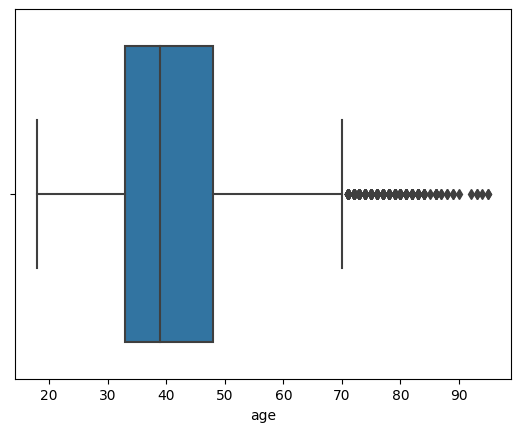

In [38]:
sns.boxplot(x = train.age)

<ipython-input-39-6ed8838f1a45>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp = temp.fillna(temp.mean())


<Axes: xlabel='age_rango', ylabel='y'>

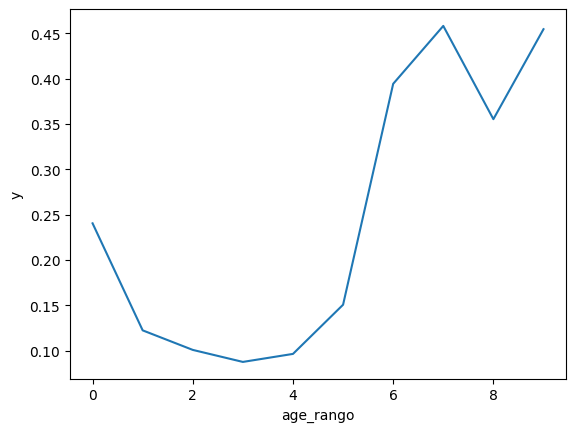

In [39]:
# Discretizar variables
from sklearn.preprocessing import KBinsDiscretizer

var = 'age'
temp = train.copy()
temp = temp.fillna(temp.mean())


discretizer = KBinsDiscretizer(n_bins = 10,
                               encode = 'ordinal',
                               strategy = "uniform").fit(np.array(temp[var]).reshape(-1, 1))

temp[var + '_rango'] = discretizer.transform(np.array(temp[var]).reshape(-1, 1))

# Interpretación del ratio de evento por tramo de variable numérica
sns.lineplot(data = temp.groupby(var + '_rango').agg({'y': 'mean'}).reset_index(),
             x = var + '_rango',
             y = 'y')

<Axes: xlabel='balance_rango', ylabel='y'>

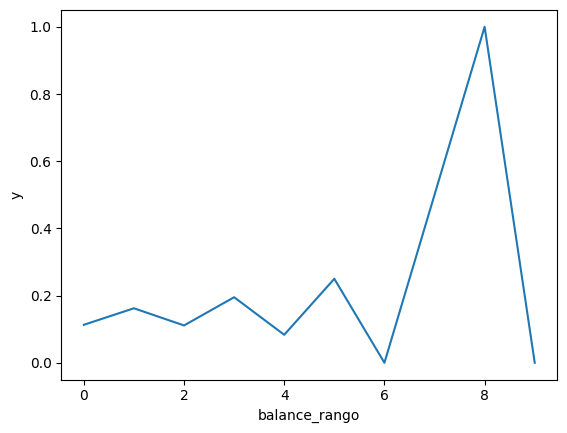

In [94]:
var = 'balance'

discretizer = KBinsDiscretizer(n_bins = 10,
                               encode = 'ordinal',
                               strategy = "uniform").fit(np.array(temp[var]).reshape(-1, 1))

temp[var + '_rango'] = discretizer.transform(np.array(temp[var]).reshape(-1, 1))

# Interpretación del ratio de evento por tramo de variable numérica
sns.lineplot(data = temp.groupby(var + '_rango').agg({'y': 'mean'}).reset_index(),
             x = var + '_rango',
             y = 'y')

<Axes: xlabel='day_rango', ylabel='y'>

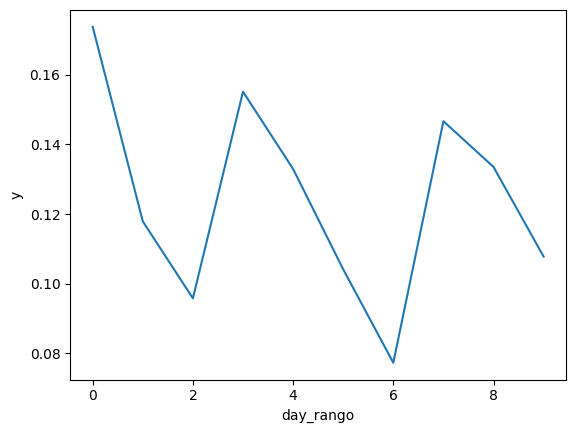

In [88]:
var = 'day'

discretizer = KBinsDiscretizer(n_bins = 10,
                               encode = 'ordinal',
                               strategy = "uniform").fit(np.array(temp[var]).reshape(-1, 1))

temp[var + '_rango'] = discretizer.transform(np.array(temp[var]).reshape(-1, 1))

# Interpretación del ratio de evento por tramo de variable numérica
sns.lineplot(data = temp.groupby(var + '_rango').agg({'y': 'mean'}).reset_index(),
             x = var + '_rango',
             y = 'y')

<Axes: xlabel='duration_rango', ylabel='y'>

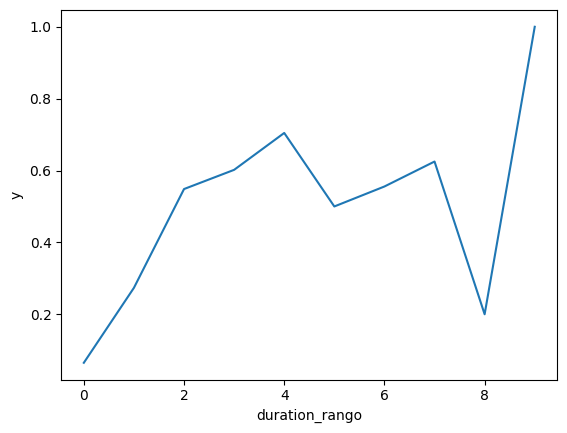

In [89]:
var = 'duration'

discretizer = KBinsDiscretizer(n_bins = 10,
                               encode = 'ordinal',
                               strategy = "uniform").fit(np.array(temp[var]).reshape(-1, 1))

temp[var + '_rango'] = discretizer.transform(np.array(temp[var]).reshape(-1, 1))

# Interpretación del ratio de evento por tramo de variable numérica
sns.lineplot(data = temp.groupby(var + '_rango').agg({'y': 'mean'}).reset_index(),
             x = var + '_rango',
             y = 'y')

<Axes: xlabel='campaign_rango', ylabel='y'>

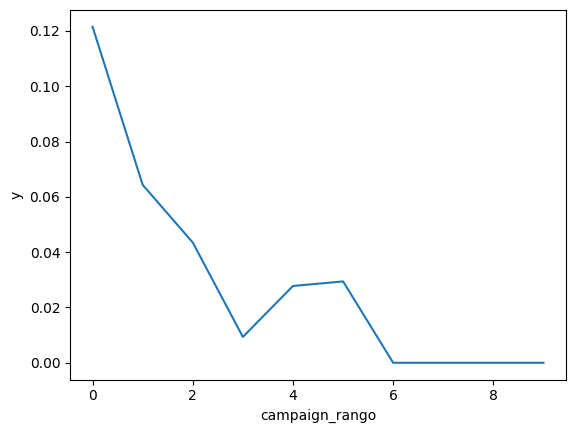

In [90]:
var = 'campaign'

discretizer = KBinsDiscretizer(n_bins = 10,
                               encode = 'ordinal',
                               strategy = "uniform").fit(np.array(temp[var]).reshape(-1, 1))

temp[var + '_rango'] = discretizer.transform(np.array(temp[var]).reshape(-1, 1))

# Interpretación del ratio de evento por tramo de variable numérica
sns.lineplot(data = temp.groupby(var + '_rango').agg({'y': 'mean'}).reset_index(),
             x = var + '_rango',
             y = 'y')

<Axes: xlabel='pdays_rango', ylabel='y'>

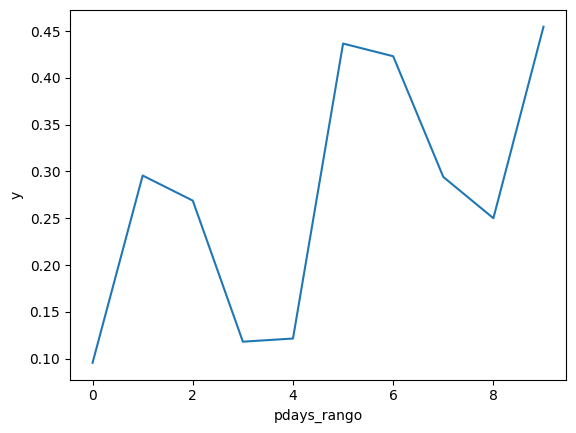

In [91]:
var = 'pdays'

discretizer = KBinsDiscretizer(n_bins = 10,
                               encode = 'ordinal',
                               strategy = "uniform").fit(np.array(temp[var]).reshape(-1, 1))

temp[var + '_rango'] = discretizer.transform(np.array(temp[var]).reshape(-1, 1))

# Interpretación del ratio de evento por tramo de variable numérica
sns.lineplot(data = temp.groupby(var + '_rango').agg({'y': 'mean'}).reset_index(),
             x = var + '_rango',
             y = 'y')

<Axes: xlabel='previous_rango', ylabel='y'>

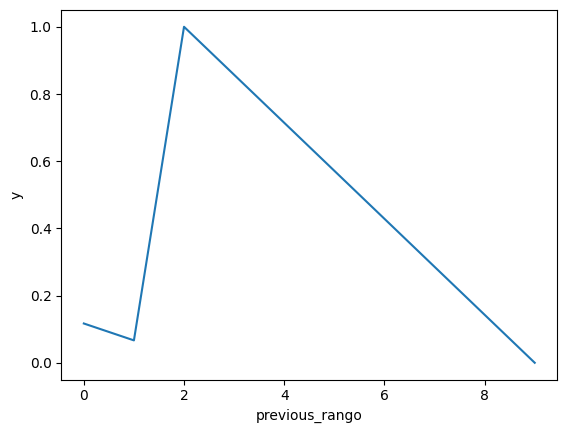

In [92]:
var = 'previous'

discretizer = KBinsDiscretizer(n_bins = 10,
                               encode = 'ordinal',
                               strategy = "uniform").fit(np.array(temp[var]).reshape(-1, 1))

temp[var + '_rango'] = discretizer.transform(np.array(temp[var]).reshape(-1, 1))

# Interpretación del ratio de evento por tramo de variable numérica
sns.lineplot(data = temp.groupby(var + '_rango').agg({'y': 'mean'}).reset_index(),
             x = var + '_rango',
             y = 'y')

*

## Tratamiento de Missing

In [96]:
train = train.fillna(train.median())
test  = test.fillna(train.median())

<ipython-input-96-b1ef414424de>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train = train.fillna(train.median())
<ipython-input-96-b1ef414424de>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test  = test.fillna(train.median())


## Pre-Selección de Variables

In [137]:
# Numerical Features
variables_numericas.remove('y')
numerical_features = variables_numericas

In [99]:
## Pre-Selección de Variables
from sklearn.metrics import roc_auc_score

dfgini = pd.DataFrame({'feature': numerical_features + categorical_features_coded,
                       'gini': [roc_auc_score(train.y, train[col])*2-1 for col in numerical_features + categorical_features_coded]})

dfgini['gini_abs'] = dfgini.gini.apply(lambda x: abs(x))

dfgini.sort_values(by = 'gini_abs', ascending = False)

feature      gini  gini_abs
3          duration  0.619250  0.619250
14      month_coded  0.314496  0.314496
15   poutcome_coded  0.222789  0.222789
13    contact_coded  0.218052  0.218052
11    housing_coded  0.209372  0.209372
7         job_coded  0.200614  0.200614
6          previous  0.199415  0.199415
5             pdays  0.181596  0.181596
1           balance  0.178053  0.178053
4          campaign -0.144170  0.144170
9   education_coded  0.109445  0.109445
8     marital_coded  0.104012  0.104012
12       loan_coded  0.076107  0.076107
2               day -0.046568  0.046568
10    default_coded  0.009189  0.009189
0               age -0.007661  0.007661

In [100]:
univariate_II = pd.merge(univariate, dfgini, on = 'feature', how = 'left')
univariate_II.sort_values(by = 'gini_abs', ascending = False)

feature    count         mean          std          min  \
3          duration  31647.0   258.173065   258.623603     0.000000   
15      month_coded  31647.0     0.116978     0.083810     0.066756   
16   poutcome_coded  31647.0     0.116978     0.099283     0.092126   
14    contact_coded  31647.0     0.116978     0.048312     0.040985   
12    housing_coded  31647.0     0.116978     0.043545     0.078196   
8         job_coded  31647.0     0.116978     0.043117     0.076507   
6          previous  31647.0     0.584605     2.472085     0.000000   
5             pdays  31647.0    40.340917   100.261049    -1.000000   
1           balance  31647.0  1373.386040  3047.179071 -6847.000000   
4          campaign  31647.0     2.779000     3.124117     1.000000   
10  education_coded  31647.0     0.116978     0.022003     0.090324   
9     marital_coded  31647.0     0.116978     0.021532     0.100525   
13       loan_coded  31647.0     0.116978     0.021452     0.067800   
2               day  31647.0    15.834234     8.335395     1.000000   
11    default_coded  31647.0     0.116978     0.007225     0.062950   
0               age  31647.0    40.972825    10.657961    18.000000   
7                 y  31647.0     0.116978     0.321399     0.000000   

            p5      median          p95            max  missing_rate  \
3    35.000000  179.000000   756.000000    3881.000000           0.0   
15    0.066756    0.099112     0.205453       0.495468           0.0   
16    0.092126    0.092126     0.162539       0.643059           0.0   
14    0.040985    0.149123     0.149123       0.149123           0.0   
12    0.078196    0.078196     0.165869       0.165869           0.0   
8     0.076507    0.108944     0.235962       0.278614           0.0   
6     0.000000    0.000000     3.000000     275.000000           0.0   
5    -1.000000   -1.000000   315.000000     871.000000           0.0   
1  -168.000000  448.000000  5832.100000  102127.000000           0.0   
4     1.000000    2.000000     8.000000      58.000000           0.0   
10    0.090324    0.105250     0.147732       0.147732           0.0   
9     0.100525    0.100525     0.149340       0.149340           0.0   
13    0.067800    0.126335     0.126335       0.126335           0.0   
2     3.000000   16.000000    29.000000      31.000000           0.0   
11    0.117944    0.117944     0.117944       0.117944           0.0   
0    27.000000   39.000000    59.000000      95.000000           0.0   
7     0.000000    0.000000     1.000000       1.000000           0.0   

        gini  gini_abs  
3   0.619250  0.619250  
15  0.314496  0.314496  
16  0.222789  0.222789  
14  0.218052  0.218052  
12  0.209372  0.209372  
8   0.200614  0.200614  
6   0.199415  0.199415  
5   0.181596  0.181596  
1   0.178053  0.178053  
4  -0.144170  0.144170  
10  0.109445  0.109445  
9   0.104012  0.104012  
13  0.076107  0.076107  
2  -0.046568  0.046568  
11  0.009189  0.009189  
0  -0.007661  0.007661  
7        NaN       NaN

In [101]:
# Aca podemos definir los criterios para seleccionar variables

print('initial features: ' + str(len(univariate_II)))
print('selected features: ' + str(len(univariate_II.loc[(univariate_II.gini_abs >= 0.05) & (univariate_II.missing_rate <= 0.50)])))
final_features = univariate_II.loc[(univariate_II.gini_abs >= 0.05) & (univariate_II.missing_rate <= 0.50)].feature.tolist()

initial features: 17
selected features: 13


### Estandarización

In [102]:
train[[x + '_std' for x in final_features]] = (train[final_features] - train[final_features].mean())/train[final_features].std()
test[[x + '_std' for x in final_features]] = (test[final_features] - train[final_features].mean())/train[final_features].std()

## Regresión Logística

In [103]:
import statsmodels.api as sm

# Fit and summarize OLS model
mod = sm.Logit(train.y,
               sm.add_constant(train[[x + '_std' for x in final_features]]))
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.241533
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31633
Method:                           MLE   Df Model:                           13
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.3307
Time:                        00:49:56   Log-Likelihood:                -7643.8
converged:                       True   LL-Null:                       -11420.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.7889      0.029    -95.140      0.000      -2.846      -2.731
ba

In [118]:
features = [x + '_std' for x in final_features]
features.remove('pdays_std')

mod = sm.Logit(train.y, sm.add_constant(train[features]))
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.241536
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31634
Method:                           MLE   Df Model:                           12
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.3307
Time:                        01:10:47   Log-Likelihood:                -7643.9
converged:                       True   LL-Null:                       -11420.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.7892      0.029    -95.166      0.000      -2.847      -2.732
ba

In [121]:
features.remove('previous_std')
mod = sm.Logit(train.y, sm.add_constant(train[features]))
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.241550
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31635
Method:                           MLE   Df Model:                           11
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.3306
Time:                        01:11:31   Log-Likelihood:                -7644.3
converged:                       True   LL-Null:                       -11420.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.7887      0.029    -95.186      0.000      -2.846      -2.731
ba

In [123]:
features.remove('balance_std')
mod = sm.Logit(train.y, sm.add_constant(train[features]))
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.241619
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31636
Method:                           MLE   Df Model:                           10
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.3304
Time:                        01:11:59   Log-Likelihood:                -7646.5
converged:                       True   LL-Null:                       -11420.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.7880      0.029    -95.200      0.000      -2.845      -2.731
du

correlaciones

### Performance

In [125]:
# Usando el modelo para predecir
train_II = train.copy()
test_II  = test.copy()

train_II['probability'] = res.predict(sm.add_constant(train[features]))
test_II['probability']  = res.predict(sm.add_constant(test[features]))

train_II['prediction'] = train_II['probability'].apply(lambda x: 1 if x > 0.5 else 0)
test_II['prediction']  = test_II['probability'].apply(lambda x: 1 if x > 0.5 else 0)


In [126]:
test_II

age           job   marital  education default  balance housing loan  \
5997    26   blue-collar    single  secondary      no      339     yes   no   
39268   34   blue-collar   married  secondary      no      463     yes   no   
9555    59       retired   married  secondary      no      444     yes   no   
9044    47  entrepreneur   married  secondary      no        0      no   no   
42981   34    management  divorced   tertiary      no     2885      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
39833   34    management   married   tertiary      no      690     yes   no   
32030   25       student    single  secondary      no     1765     yes   no   
4644    33      services    single  secondary      no        0     yes   no   
4091    50      services   married  secondary      no     1463     yes   no   
44440   38        admin.    single  secondary      no      115      no   no   

         contact  day  ... job_coded_std  marital_coded_std  \
5997     unknown   26  ...     -0.938638           1.502999   
39268   cellular   18  ...     -0.938638          -0.764092   
9555     unknown    6  ...      2.759571          -0.764092   
9044     unknown    5  ...     -0.878457          -0.764092   
42981   cellular   10  ...      0.365021           0.298240   
...          ...  ...  ...           ...                ...   
39833   cellular    1  ...      0.365021          -0.764092   
32030  telephone   14  ...      3.748796           1.502999   
4644     unknown   20  ...     -0.620641           1.502999   
4091     unknown   19  ...     -0.620641          -0.764092   
44440   cellular    5  ...      0.124919           1.502999   

       education_coded_std  housing_coded_std  loan_coded_std  \
5997             -0.533005          -0.890623        0.436197   
39268            -0.533005          -0.890623        0.436197   
9555             -0.533005          -0.890623        0.436197   
9044             -0.533005           1.122774        0.436197   
42981             1.397731           1.122774        0.436197   
...                    ...                ...             ...   
39833             1.397731          -0.890623        0.436197   
32030            -0.533005          -0.890623        0.436197   
4644             -0.533005          -0.890623        0.436197   
4091             -0.533005          -0.890623        0.436197   
44440            -0.533005           1.122774        0.436197   

      contact_coded_std  month_coded_std  poutcome_coded_std  probability  \
5997          -1.572963        -0.599230           -0.250314     0.010733   
39268          0.665365        -0.599230            0.076787     0.007736   
9555          -1.572963        -0.175531           -0.250314     0.019205   
9044          -1.572963        -0.175531           -0.250314     0.818621   
42981          0.665365         0.600408            0.458900     0.238181   
...                 ...              ...                 ...          ...   
39833          0.665365        -0.175531           -0.250314     0.031594   
32030          0.282012         1.055655            0.076787     0.094001   
4644          -1.572963        -0.599230           -0.250314     0.011618   
4091          -1.572963        -0.599230           -0.250314     0.026232   
44440          0.665365        -0.076098            0.076787     0.126575   

       prediction  
5997            0  
39268           0  
9555            0  
9044            1  
42981           0  
...           ...  
39833           0  
32030           0  
4644            0  
4091            0  
44440           0  

[13564 rows x 59 columns]

In [128]:
# AUC
print('TRAIN AUC: %f' %(roc_auc_score(train.y, train_II.probability)))
print('TEST AUC: %f' %(roc_auc_score(test.y, test_II.probability)))

TRAIN AUC: 0.906759
TEST AUC: 0.902701


In [129]:
# GINI
print('TRAIN GINI: %f' %(roc_auc_score(train.y, train_II.probability)*2-1))
print('TEST GINI: %f' %(roc_auc_score(test.y, test_II.probability)*2-1))

TRAIN GINI: 0.813519
TEST GINI: 0.805401


In [130]:
# ACCURACY
from sklearn.metrics import accuracy_score
print('TRAIN ACCURACY: %f' %(accuracy_score(train.y, train_II.prediction)))
print('TEST ACCURACY: %f' %(accuracy_score(test.y, test_II.prediction)))

TRAIN ACCURACY: 0.901981
TEST ACCURACY: 0.902020


In [131]:
# PRECISION
from sklearn.metrics import precision_score
print('TRAIN PRECISION: %f' %(precision_score(train.y, train_II.prediction)))
print('TEST PRECISION: %f' %(precision_score(test.y, test_II.prediction)))

TRAIN PRECISION: 0.652905
TEST PRECISION: 0.664962


In [132]:
# RECALL
print('TRAIN RECALL: %f' %(recall_score(train.y, train_II.prediction)))
print('TEST RECALL: %f' %(recall_score(test.y, test_II.prediction)))

TRAIN RECALL: 0.346029
TEST RECALL: 0.327662


In [133]:
# F1-SCORE
print('TRAIN F1-SCORE: %f' %(f1_score(train.y, train_II.prediction)))
print('TEST F1-SCORE: %f' %(f1_score(test.y, test_II.prediction)))

TRAIN F1-SCORE: 0.452331
TEST F1-SCORE: 0.439004


In [134]:
confusion_matrix(train.y, train_II.prediction)

array([[27264,   681],
       [ 2421,  1281]])

In [135]:
confusion_matrix(test.y, test_II.prediction)

array([[11715,   262],
       [ 1067,   520]])